# Multiplicative Weights

Below is multiplicative weights implemented for binary sequence prediction. Feel free to modify it!


## Code

In [1]:
import numpy as np

### Algorithm

In [2]:
def MW(T, update, sequence, experts):
    """
    Multiplicative Weights
    
    T            : (int)        time horizon
    update(l)    : (function)   how to update experts given loss l
    sequence[t]  : (int array)  what you're trying to predict at round t
    experts[i][t]: (int array)  what the ith expert says to predict at round t
    
    """
    weights = np.array([1 for _ in range(len(experts))])
    losses  = []
    
    for t in range(T):
        
        # Sum of weights.
        W_t = sum([weights[i] for i in range(len(experts))])
        
        # Probability of predicting 1.
        p_t = weights / W_t
        
        # Draw expert according to distribution.
        e_t = np.random.choice(len(experts), 1, p=p_t)[0]
                              
        # Recieve loss.
        loss= int(experts[e_t][t] != sequence[t])
        losses.append(loss)
        
        # Update weights.
        l_t = map(lambda e: int(e[t] != sequence[t]), experts)
        weights = weights * np.fromiter(map(update, l_t), dtype=float)
            
                      
    return {"losses": losses, "weights": weights}

In [3]:
T = 1000

### Define the sequence you're trying to predict here

In [4]:
sequence_1 = np.random.binomial(size=T, n=1, p = 0.50)
sequence_2 = np.random.binomial(size=T, n=1, p = 0.75)
sequence_3 = [0] * 350 + [1] * (T - 350)
sequence_4 = [0] * 150 + [1] * (T - 150)

### Define your set of experts here

I have already created a fairly basic reference class, all $0$s and all $1$s. Try creating more complex ones for binary sequence prediction!

Note: if your expert class is too simple, it's possible to achieve negative regret is your best expert is so bad compared to MW. This is typically not what we want.

Edit: I added sequence 3 and 4 into the reference class.

In [5]:
ref_class = [[0] * T, [1] * T] + [sequence_3, sequence_4]

### Testing implementation on deterministic sequence

We include the sequence we're trying to test within the set of experts itself to check that it'll converge / give it max weight after $T$ rounds. It should print out $2$ and $3$ since that's where we put the best sequence.

In [6]:
print(np.argmax(MW(T, lambda l: np.exp(-0.2 * l), sequence_3, ref_class)["weights"]))
print(np.argmax(MW(T, lambda l: np.exp(-0.2 * l), sequence_4, ref_class)["weights"]))

2
3


# Plots

In [7]:
import matplotlib.pyplot as plt

In [8]:
eta = np.sqrt(np.log(len(ref_class)) / T)
eta

0.037232974110590344

In [9]:
def find_best_expert(ref_class, sequence):
    """
    Finds the best expert in hindsight (performs argmin over loss).
    """
    return min(range(len(ref_class)), key=lambda i: sum(np.array(ref_class[i]) != np.array(sequence)))

def calculate_loss(sequence_0, sequence_1):
    """
    Returns cumulative (Hamming) loss of sequence_0 against sequence_1.
    """
    return np.cumsum(np.array(sequence_0) != np.array(sequence_1))

In [10]:
MW_on_seq1 = MW(T, lambda l: np.exp(-eta * l), sequence_1, ref_class)
MW_on_seq2 = MW(T, lambda l: np.exp(-eta * l), sequence_2, ref_class)
MW_on_seq3 = MW(T, lambda l: np.exp(-eta * l), sequence_3, ref_class)
MW_on_seq4 = MW(T, lambda l: np.exp(-eta * l), sequence_4, ref_class)

regret_1 = np.cumsum(MW_on_seq1["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_1)], sequence_1)
regret_2 = np.cumsum(MW_on_seq2["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_2)], sequence_2)
regret_3 = np.cumsum(MW_on_seq3["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_3)], sequence_3)
regret_4 = np.cumsum(MW_on_seq4["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_4)], sequence_4)

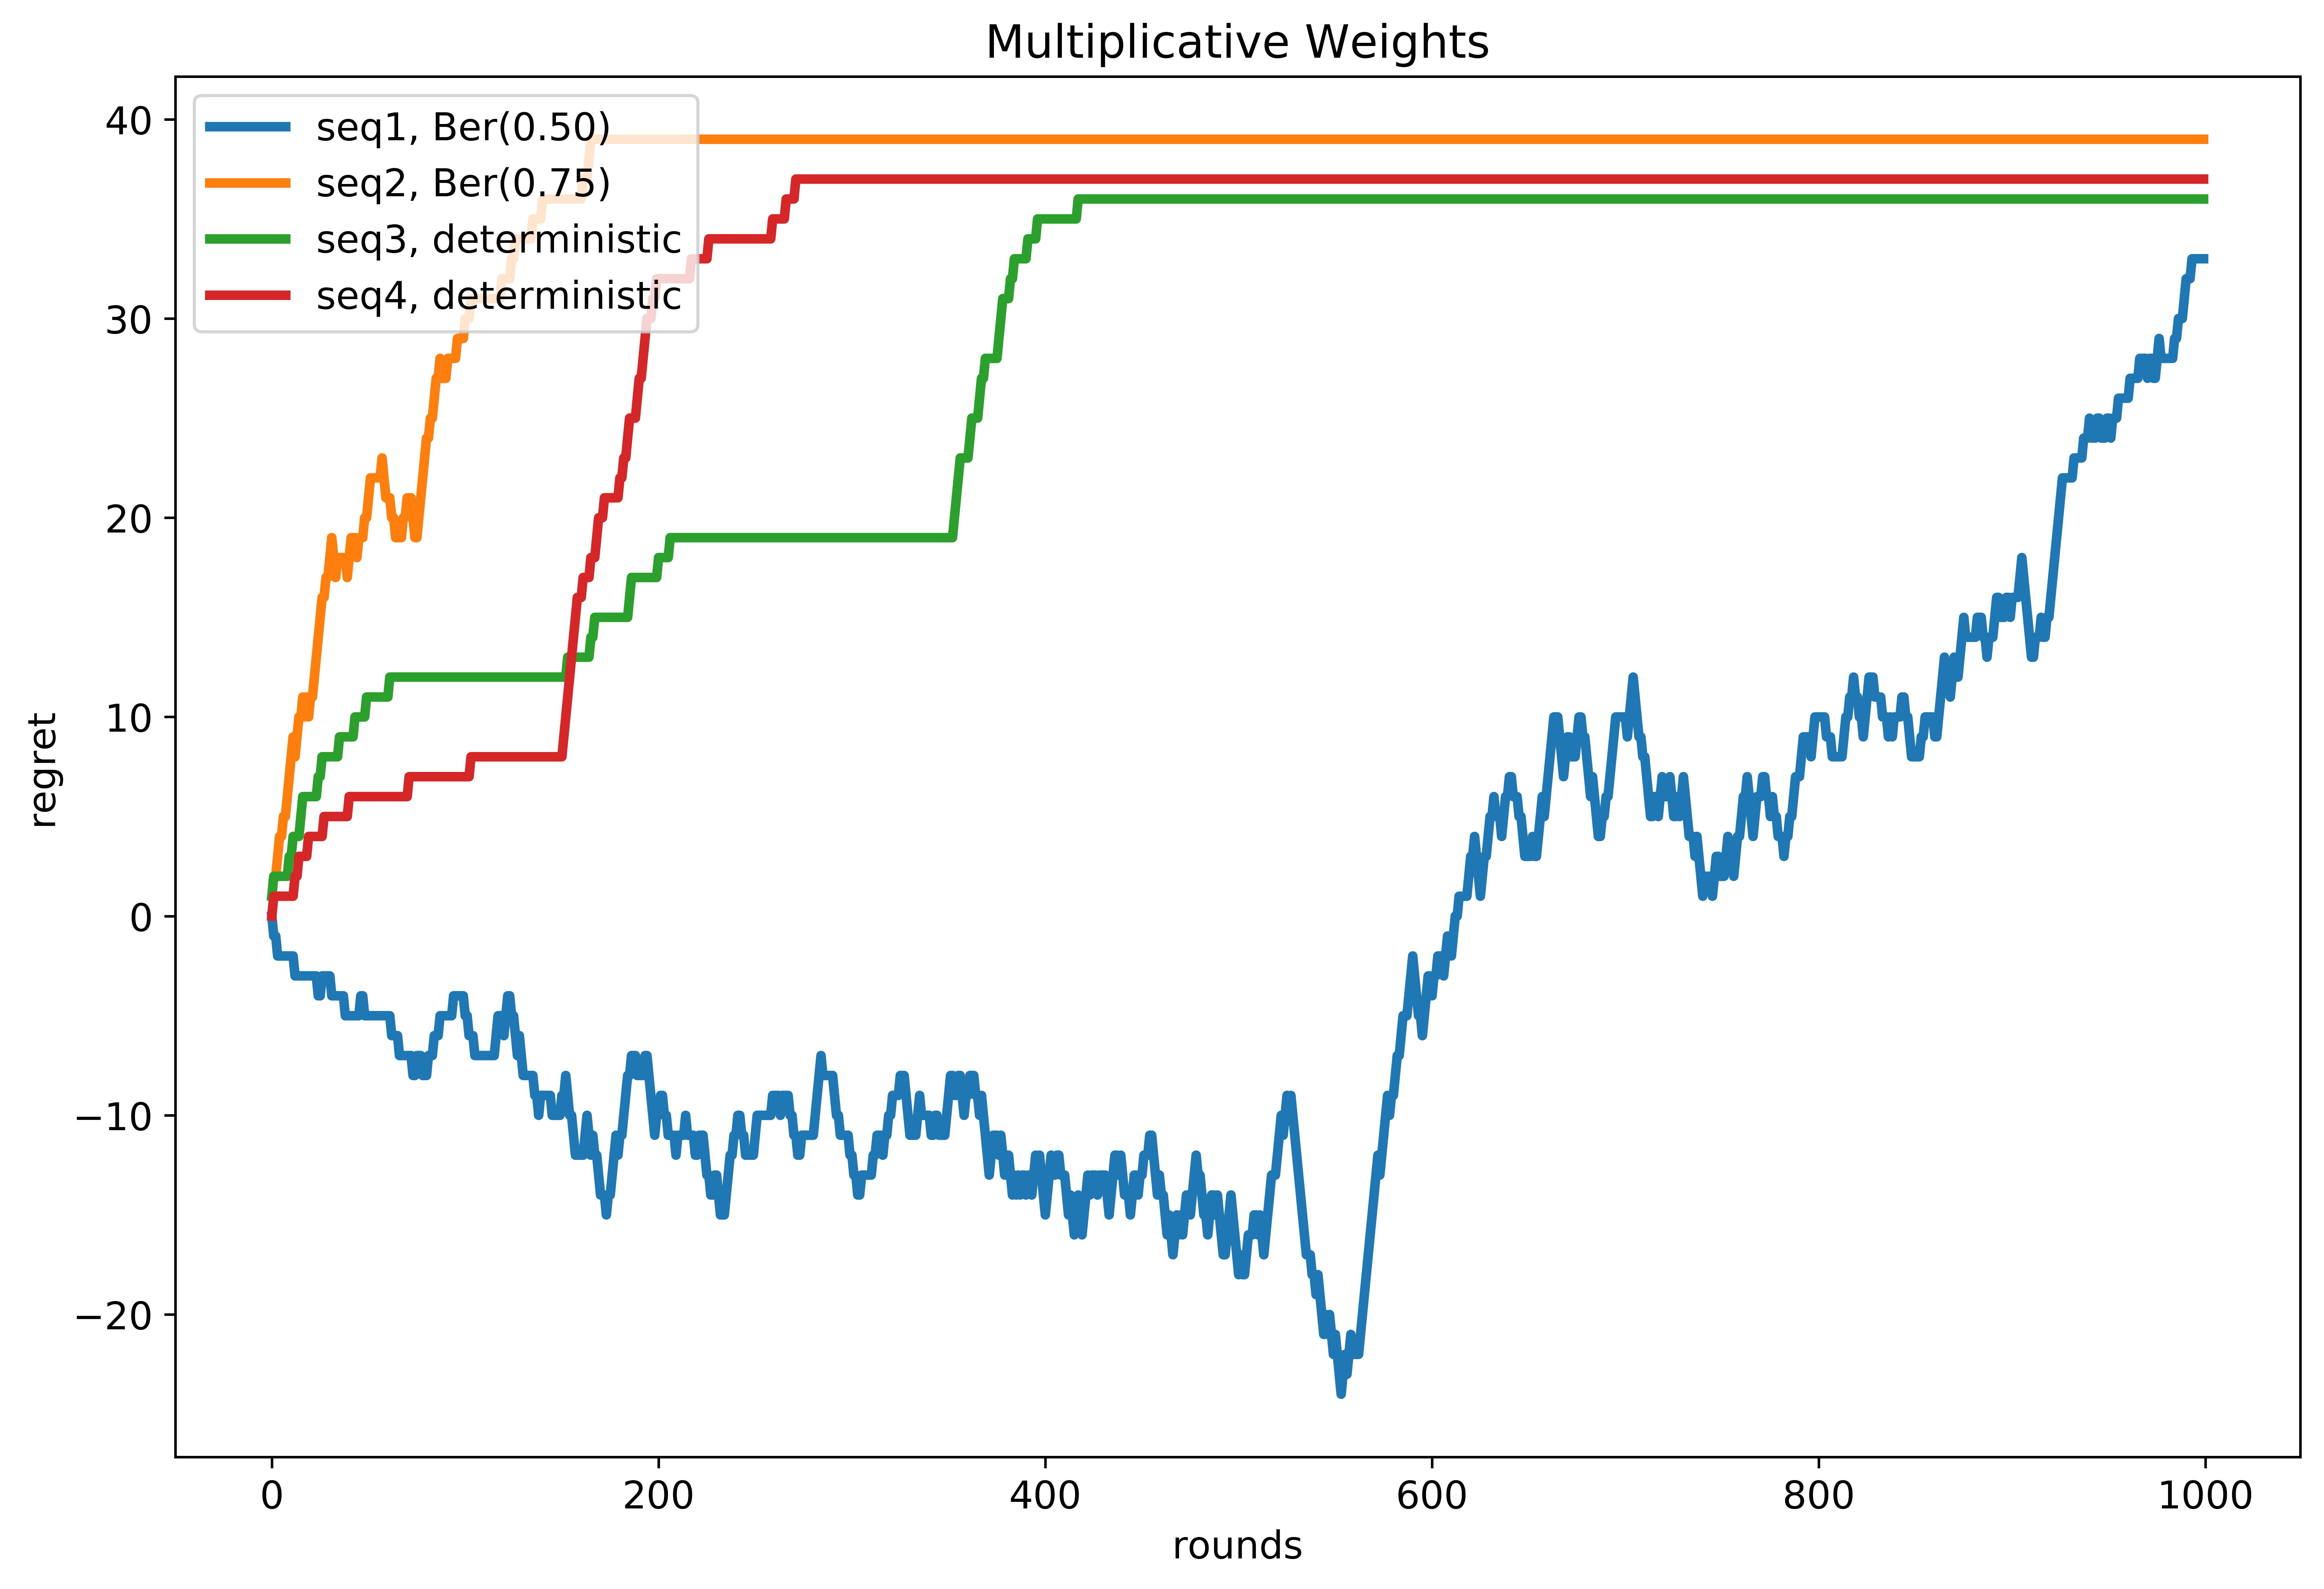

In [11]:
plt.rc('font', size=12) 
plt.figure(figsize=(12, 8), dpi=800)

plt.title("Multiplicative Weights")
plt.xlabel("rounds")
plt.ylabel("regret")

plt.plot(range(T), regret_1, label="seq1, Ber(0.50)",     linewidth=3)
plt.plot(range(T), regret_2, label="seq2, Ber(0.75)",     linewidth=3)
plt.plot(range(T), regret_3, label="seq3, deterministic", linewidth=3)
plt.plot(range(T), regret_4, label="seq4, deterministic", linewidth=3)

plt.legend(loc=2)
plt.show()

In [15]:
MW_func1 = MW(T, lambda l: np.exp(-eta * l), sequence_3, ref_class)
MW_func2 = MW(T, lambda l: (1 / 2)**l      , sequence_3, ref_class)
MW_func3 = MW(T, lambda l: (1 - eta * l)   , sequence_3, ref_class)
MW_func4 = MW(T, lambda l: (1 - eta)**l    , sequence_3, ref_class)

regret_5 = np.cumsum(MW_func1["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_3)], sequence_3)
regret_6 = np.cumsum(MW_func2["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_3)], sequence_3)
regret_7 = np.cumsum(MW_func3["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_3)], sequence_3)
regret_8 = np.cumsum(MW_func4["losses"]) - calculate_loss(ref_class[find_best_expert(ref_class, sequence_3)], sequence_3)

In [16]:
print(np.argmax(MW_func1["weights"]))
print(np.argmax(MW_func2["weights"]))
print(np.argmax(MW_func3["weights"]))
print(np.argmax(MW_func4["weights"]))

2
2
2
2


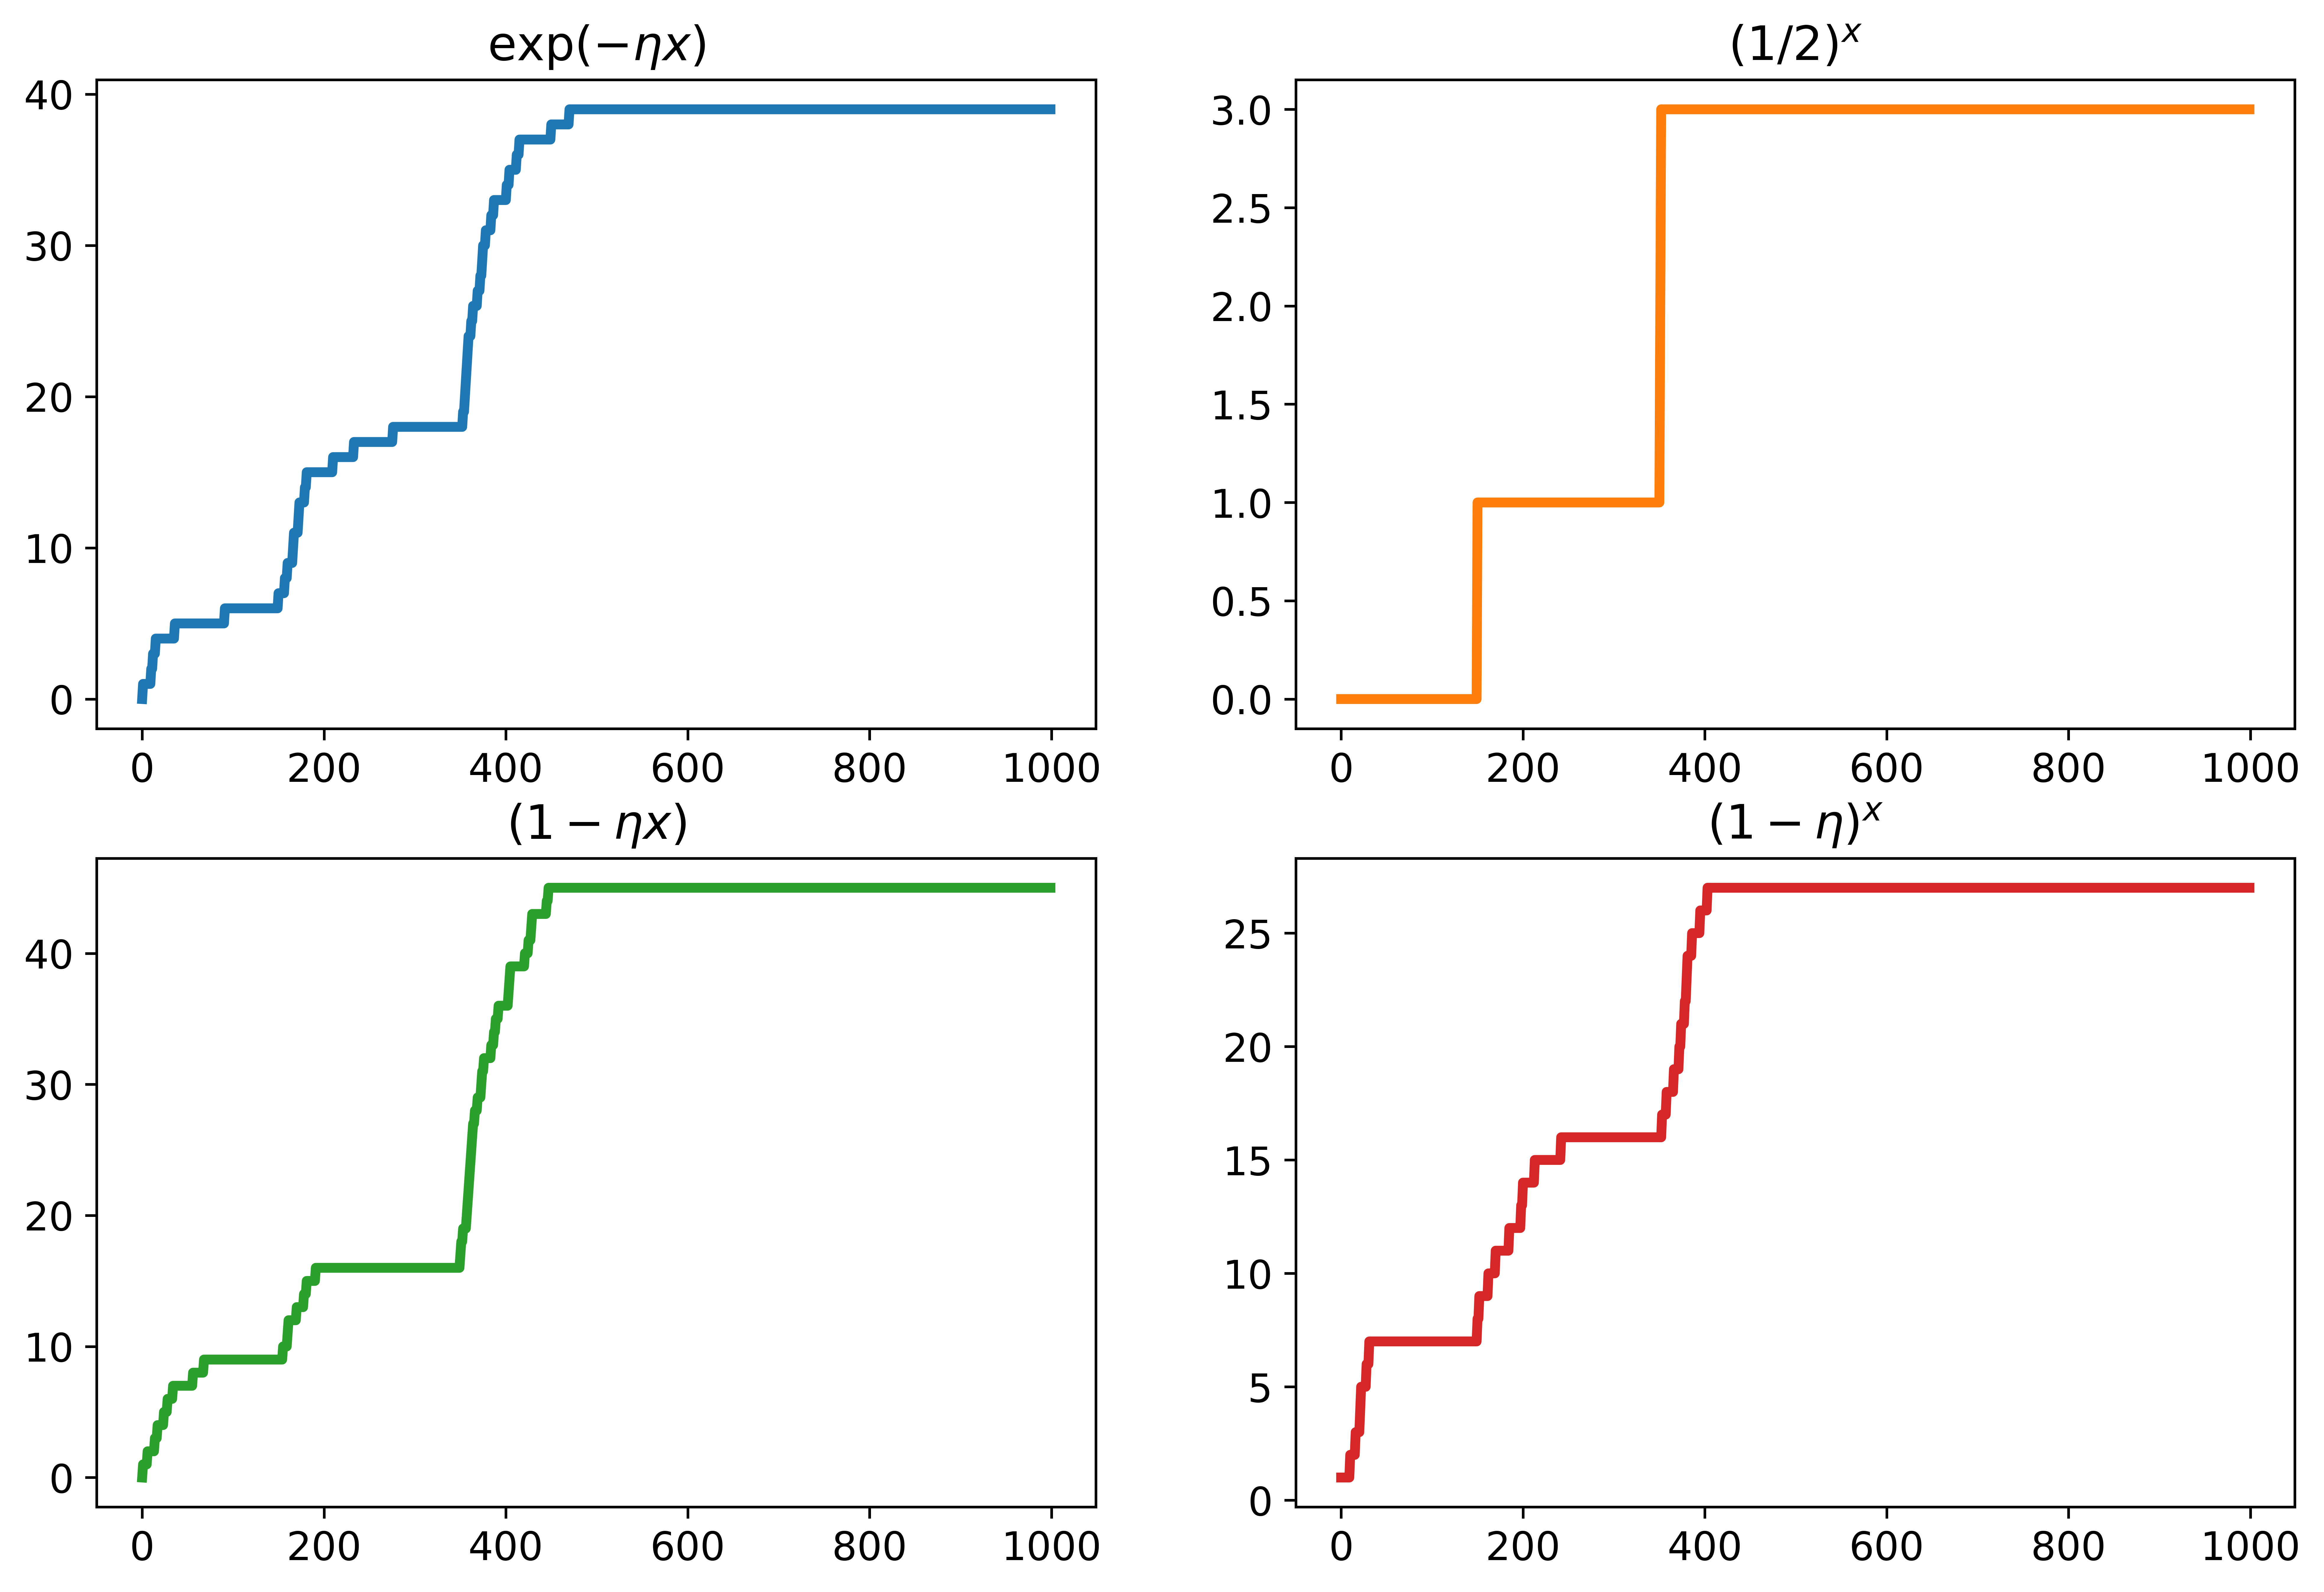

In [17]:
plt.rc('font', size=12) 
plt.figure(figsize=(12, 8), dpi=800)

plt.title("Multiplicative Weights")
plt.xlabel("rounds")
plt.ylabel("regret")

plt.subplot(2, 2, 1)
plt.title(r"$\exp(-\eta x)$")
plt.plot(range(T), regret_5, linewidth=3, color="C0")

plt.subplot(2, 2, 2)
plt.title(r"$(1/2)^x$")
plt.plot(range(T), regret_6, linewidth=3, color="C1")

plt.subplot(2, 2, 3)
plt.title(r"$(1 - \eta x)$")
plt.plot(range(T), regret_7, linewidth=3, color="C2")

plt.subplot(2, 2, 4)
plt.title(r"$(1 - \eta)^x$")
plt.plot(range(T), regret_8, linewidth=3, color="C3")

plt.legend(loc=2)
plt.show()